In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random #
import statistics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import confusion_matrix,accuracy_score

In [12]:
def scale_data(X_train, X_test):
    sc = StandardScaler()
    X_train_scale = sc.fit_transform(X_train)
    X_test_scale = sc.transform(X_test)
    return X_train_scale, X_test_scale

In [78]:
dataset = pd.read_csv("data/lymphography.data")
X = dataset.loc[:, dataset.columns != "class"]
y = dataset.loc[:, dataset.columns == "class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(dataset)

class  lymphatics  block of affere  block of lymph c  block of lymph s  \
0        3           4                2                 1                 1   
1        2           3                2                 1                 1   
2        3           3                2                 2                 2   
3        3           3                1                 1                 1   
4        2           3                1                 1                 1   
..     ...         ...              ...               ...               ...   
143      3           3                2                 1                 1   
144      2           2                1                 1                 1   
145      3           2                2                 1                 1   
146      2           2                1                 1                 1   
147      2           2                2                 2                 1   

     by pass  extravasates  regeneration of  early uptak

In [79]:
X_train_scale, X_test_scale = scale_data(X_train, X_test)

In [141]:
# PCA
pca = PCA()
pca.fit(X_train_scale)
# print(pca.explained_variance_ratio_)
pca_ar = []
pca_ar_indexes = []
for i in range(pca.components_.shape[0]):
    item = np.abs(pca.components_[i].argmax())
    pca_ar_indexes.append(item)
    pca_ar.append(X_train.columns[item])
pca_ar_uniq = list(set(pca_ar))
print(pd.DataFrame(pca_ar_indexes + pca_ar))
print(pd.DataFrame(pca_ar))
print(pd.DataFrame(pca_ar_uniq))

0
0                  17
1                   8
2                  17
3                  13
4                  15
5                   7
6                  12
7                  13
8                   9
9                   1
10                  4
11                  3
12                  1
13                  6
14                 15
15                  6
16                  4
17                 17
18     no of nodes in
19  lymph nodes dimin
20     no of nodes in
21    changes in stru
22     dislocation of
23    early uptake in
24    changes in node
25    changes in stru
26  lymph nodes enlar
27    block of affere
28            by pass
29   block of lymph s
30    block of affere
31    regeneration of
32     dislocation of
33    regeneration of
34            by pass
35     no of nodes in
                    0
0      no of nodes in
1   lymph nodes dimin
2      no of nodes in
3     changes in stru
4      dislocation of
5     early uptake in
6     changes in node
7     changes in stru
8   lymp

In [133]:
PCA_EXTRACT_4 = ["no of nodes in", "lymph nodes dimin", "changes in stru", "dislocation of"]
PCA_EXTRACT_INDEXES_4 = [17, 8, 13, 15]

PCA_EXTRACT_8 = ["no of nodes in", "lymph nodes dimin", "changes in stru", "dislocation of", "early uptake in", "changes in node", "lymph nodes enlar", "block of affere"]
PCA_EXTRACT_INDEXES_8 = [17, 8, 13, 15, 7, 12, 9, 1]

PCA_EXTRACT_11 = ["no of nodes in", "lymph nodes dimin", "changes in stru", "dislocation of", "early uptake in", "changes in node", "lymph nodes enlar", "block of affere", "by pass", "block of lymph s", "regeneration of"]
PCA_EXTRACT_INDEXES_11 = [17, 8, 13, 15, 7, 12, 9, 1, 4, 3, 6]

[0.02414352 0.15143756 0.03117508 0.00475818 0.05056731 0.04158151
 0.02897169 0.07138064 0.0169858  0.06307996 0.0286281  0.03068715
 0.09799391 0.07361884 0.0931376  0.05338325 0.03284391 0.10562596]
Feature importance
lymphatics           0.024144
block of affere      0.151438
block of lymph c     0.031175
block of lymph s     0.004758
by pass              0.050567
extravasates         0.041582
regeneration of      0.028972
early uptake in      0.071381
lymph nodes dimin    0.016986
lymph nodes enlar    0.063080
changes in lymph     0.028628
defect in node       0.030687
changes in node      0.097994
changes in stru      0.073619
special forms        0.093138
dislocation of       0.053383
exclusion of no      0.032844
no of nodes in       0.105626
dtype: float64


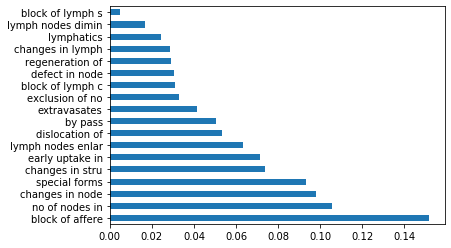

In [127]:
# Tree
etc = ExtraTreesClassifier()
etc.fit(X_train_scale, y_train.values.ravel())
print(etc.feature_importances_)
nums = range(len(X.columns))
feat_importances = pd.Series(etc.feature_importances_, index=X.columns)
feat_importances.nlargest(100).plot(kind='barh')
print("Feature importance")
print(feat_importances)
plt.show()

In [128]:
TREE_EXTRACT_4 = ["block of affere", "no of nodes in", "changes in node", "special forms"]
TREE_EXTRACT_INDEXES_4 = [1, 17, 12, 14]

TREE_EXTRACT_8 = ["block of affere", "no of nodes in", "changes in node", "special forms", "early uptake in", "changes in stru", "lymph nodes enlar", "dislocation of"]
TREE_EXTRACT_INDEXES_8 = [1, 17, 12, 14, 13, 7, 9, 15]

TREE_EXTRACT_12 = ["block of affere", "no of nodes in", "changes in node", "special forms", "early uptake in", "changes in stru", "lymph nodes enlar", "dislocation of", "by pass", "extravasates", "exclusion of no", "block of lymph c"]
TREE_EXTRACT_INDEXES_12 = [1, 17, 12, 14, 13, 7, 9, 15, 4, 5, 16, 2]


In [102]:
def svc_func(X_data, y_data, X_test_data):
    svc = SVC()
    svc.fit(X=X_data, y=y_data)
    predictions = svc.predict(X_test_data)
    cm = confusion_matrix(y_test.values.ravel(), 
    predictions)
    acc = accuracy_score(y_test.values.ravel(), predictions)
    print(cm)
    print("Accuracy {}".format(acc))
    # print("Cross val")
    # cval = cross_val_score(svc, X_test, y_test.values.ravel())
    # print(cval)
    # print("Cross val average acc {}".format(statistics.mean(cval)))

In [104]:
print("Not normalized data")
svc_func(X_train, y_train.values.ravel(), X_test)

Not normalized data
[[ 0  2  0  0]
 [ 0 24  1  0]
 [ 0  6 14  0]
 [ 0  1  1  0]]
Accuracy 0.7755102040816326


In [105]:
print("Normalized data")
svc_func(X_train_scale, y_train.values.ravel(), X_test_scale)

Normalized data
[[ 0  2  0  0]
 [ 0 25  0  0]
 [ 0  5 15  0]
 [ 0  2  0  0]]
Accuracy 0.8163265306122449


In [130]:
X_tree_train_4 = X_train[TREE_EXTRACT_4]
X_tree_test_4 = X_test[TREE_EXTRACT_4]

X_pca_train_4 = X_train[PCA_EXTRACT_4]
X_pca_test_4 = X_test[PCA_EXTRACT_4]

X_tree_train_scaled_4 = X_train_scale[:, TREE_EXTRACT_INDEXES_4]
X_tree_test_scaled_4 = X_test_scale[:, TREE_EXTRACT_INDEXES_4]

X_pca_train_scaled_4 = X_train_scale[:, PCA_EXTRACT_INDEXES_4]
X_pca_test_scaled_4 = X_test_scale[:, PCA_EXTRACT_INDEXES_4]

In [131]:
X_tree_train_8 = X_train[TREE_EXTRACT_8]
X_tree_test_8 = X_test[TREE_EXTRACT_8]

X_pca_train_8 = X_train[PCA_EXTRACT_8]
X_pca_test_8 = X_test[PCA_EXTRACT_8]

X_tree_train_scaled_8 = X_train_scale[:, TREE_EXTRACT_INDEXES_8]
X_tree_test_scaled_8 = X_test_scale[:, TREE_EXTRACT_INDEXES_8]

X_pca_train_scaled_8 = X_train_scale[:, PCA_EXTRACT_INDEXES_8]
X_pca_test_scaled_8 = X_test_scale[:, PCA_EXTRACT_INDEXES_8]

In [134]:
X_tree_train_12 = X_train[TREE_EXTRACT_12]
X_tree_test_12 = X_test[TREE_EXTRACT_12]

X_pca_train_11 = X_train[PCA_EXTRACT_11]
X_pca_test_11 = X_test[PCA_EXTRACT_11]

X_tree_train_scaled_12 = X_train_scale[:, TREE_EXTRACT_INDEXES_12]
X_tree_test_scaled_12 = X_test_scale[:, TREE_EXTRACT_INDEXES_12]

X_pca_train_scaled_11 = X_train_scale[:, PCA_EXTRACT_INDEXES_11]
X_pca_test_scaled_11 = X_test_scale[:, PCA_EXTRACT_INDEXES_11]

In [135]:
print("4 features")
print("Tree not normalized data")
svc_func(X_tree_train_4, y_train.values.ravel(), X_tree_test_4)
print("Tree normalized data")
svc_func(X_tree_train_scaled_4, y_train.values.ravel(), X_tree_test_scaled_4)

4 features
Tree not normalized data
[[ 0  1  1  0]
 [ 0 24  1  0]
 [ 0  5 15  0]
 [ 0  1  1  0]]
Accuracy 0.7959183673469388
Tree normalized data
[[ 0  0  2  0]
 [ 0 21  4  0]
 [ 0  2 18  0]
 [ 0  1  1  0]]
Accuracy 0.7959183673469388


In [136]:
print("4 features")
print("PCA not normalized data")
svc_func(X_pca_train_4, y_train.values.ravel(), X_pca_test_4)
print("PCA normalized data")
svc_func(X_pca_train_scaled_4, y_train.values.ravel(), X_pca_test_scaled_4)

4 features
PCA not normalized data
[[ 0  2  0  0]
 [ 0 24  1  0]
 [ 0  8 12  0]
 [ 0  0  2  0]]
Accuracy 0.7346938775510204
PCA normalized data
[[ 0  2  0  0]
 [ 0 21  4  0]
 [ 0  7 13  0]
 [ 0  0  2  0]]
Accuracy 0.6938775510204082


In [137]:
print("8 features")
print("Tree not normalized data")
svc_func(X_tree_train_8, y_train.values.ravel(), X_tree_test_8)
print("Tree normalized data")
svc_func(X_tree_train_scaled_8, y_train.values.ravel(), X_tree_test_scaled_8)

8 features
Tree not normalized data
[[ 0  2  0  0]
 [ 0 24  1  0]
 [ 0  7 13  0]
 [ 0  0  2  0]]
Accuracy 0.7551020408163265
Tree normalized data
[[ 0  2  0  0]
 [ 0 23  2  0]
 [ 0  4 16  0]
 [ 0  2  0  0]]
Accuracy 0.7959183673469388


In [138]:
print("8 features")
print("PCA not normalized data")
svc_func(X_pca_train_8, y_train.values.ravel(), X_pca_test_8)
print("PCA normalized data")
svc_func(X_pca_train_scaled_8, y_train.values.ravel(), X_pca_test_scaled_8)

8 features
PCA not normalized data
[[ 0  2  0  0]
 [ 0 23  2  0]
 [ 0  6 14  0]
 [ 0  0  2  0]]
Accuracy 0.7551020408163265
PCA normalized data
[[ 0  0  2  0]
 [ 0 21  4  0]
 [ 0  3 17  0]
 [ 0  0  2  0]]
Accuracy 0.7755102040816326


In [139]:
print("12 features")
print("Tree not normalized data")
svc_func(X_tree_train_12, y_train.values.ravel(), X_tree_test_12)
print("Tree normalized data")
svc_func(X_tree_train_scaled_12, y_train.values.ravel(), X_tree_test_scaled_12)

12 features
Tree not normalized data
[[ 0  2  0  0]
 [ 0 24  1  0]
 [ 0  7 13  0]
 [ 0  1  1  0]]
Accuracy 0.7551020408163265
Tree normalized data
[[ 0  2  0  0]
 [ 0 24  1  0]
 [ 0  5 15  0]
 [ 0  2  0  0]]
Accuracy 0.7959183673469388


In [140]:
print("11 features")
print("PCA not normalized data")
svc_func(X_pca_train_11, y_train.values.ravel(), X_pca_test_11)
print("PCA normalized data")
svc_func(X_pca_train_scaled_11, y_train.values.ravel(), X_pca_test_scaled_11)

11 features
PCA not normalized data
[[ 0  2  0  0]
 [ 0 23  2  0]
 [ 0  7 13  0]
 [ 0  1  1  0]]
Accuracy 0.7346938775510204
PCA normalized data
[[ 0  1  1  0]
 [ 0 21  4  0]
 [ 0  4 16  0]
 [ 0  0  2  0]]
Accuracy 0.7551020408163265
